<div align="center">
<img alt="if" height="200" style="border-radius:55px;" src=https://www.ifpb.edu.br/imagens/logotipos/ifpb-1>

# **Estatística Aplicada à Computação**

**CURSO BACHARELADO EM ENGENHARIA DE COMPUTAÇÃO**

**PROFESSOR:** *PAULO RIBEIRO LINS JUNIOR*

**ALUNO:** *Ynnayron Juan Lopes da Silva*

# **Lista 12**


___________

#### **1. O conjunto de dadosdados1.csvpossue notas de 100 alunos do curso de Economia da FEA-USP, em prova dadisciplina Introdução à Probabilidade e à Estatística, 1999.  Construe uma distribuição de frequencias e umgráfico para essas notas.**


,Fi,Fr,Fc
Notas,,,
1.50 =2.44,1,1.0,1
2.44 =3.39,7,7.0,8
3.39 =4.33,11,11.0,19
4.33 =5.28,15,15.0,34
5.28 =6.22,24,24.0,58
6.22 =7.17,17,17.0,75
7.17 =8.11,16,16.0,91
8.11 =9.06,5,5.0,96
9.06 =10.00,4,4.0,100


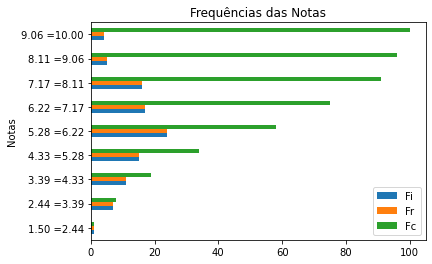

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados1 = pd.read_csv("dados1.csv", sep=';', decimal=",", names=["A","B","C","D","E","F","G","H","I","J"])
tabela = pd.Series(dados1.values.reshape(100,))
frequencia = pd.DataFrame(tabela.value_counts().sort_index())
fa,classes= np.histogram(tabela, bins='auto') 
fa = fa.astype(int)
fr = np.around(fa/fa.sum()*100,decimals=2) 
fc = np.cumsum(fa).astype(int)
classe_str = []
for i in range(len(classes)):
    if i<=len(classes)-2:
        classe_str.append('{:2.2f} ={:2.2f}' .format(classes[i],classes[i+1]))
    else:
        break        
freq2 = pd.DataFrame({'Notas':classe_str, 
                         'Fi': fa,
                         'Fr': fr,
                         'Fc': fc
                        }).set_index('Notas')


display(freq2)
plt.show(freq2.plot.barh(title="Frequências das Notas"))

_____________

#### **2. O conjunto de dadosdados2.csvmostra os dados brutos de uma amostra de 27 imóveis anunciados para vendanos anúncios de um site especializado.  Nesse exemplo, cada observação é um imóvel e cada variável é umatributo dos imóveis (bairro, tipo, número de quartos, preço).Com base nesses dados:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados2 = pd.read_csv("dados2.csv", sep=';')
dados2

,Bairro,Tipo,N de quartos,Preço (mil)
0,Barra,Apto.,2,165
1,Barra,Apto.,3,240
2,Barra,Cobt.,3,158
3,Barra,Sala,0,90
4,Botafogo,Apto.,2,270
5,Catete,Apto.,1,250
6,Centro,Sala,1,110
7,Copacabana,Apto.,2,210
8,Copacabana,Apto.,2,200
9,Copacabana,Apto.,3,280


#### **A) classifique cada variável do conjunto;**

**BAIRROS: Qualitativa Nominal**

**TIPO: Qualitativa Nominal**

**NUMEROS DE QUARTOS: Quantitativa Discreta**

**PREÇO: Quantitativa Contínua**

#### **B) monte uma distribuição de frequência para cada uma das variáveis;**

In [40]:

dadosbairros = pd.DataFrame({"Fa": dados2["Bairro"].value_counts(),
             "Fr": np.around(dados2["Bairro"].value_counts()/dados2["Bairro"].value_counts().sum()*100,decimals=2),
                "Fc": np.cumsum(dados2["Bairro"].value_counts()).astype(int)})

dadostipo = pd.DataFrame({"Fa": dados2["Tipo"].value_counts(),
             "Fr": np.around(dados2["Tipo"].value_counts()/dados2["Tipo"].value_counts().sum()*100,decimals=2),
                      "Fc": np.cumsum(dados2["Tipo"].value_counts()).astype(int)})

dadospreco = pd.DataFrame(dados2["Preço (mil)"])
                       
                       
fa,classes= np.histogram(dadospreco, bins='auto') 
fa = fa.astype(int)
fr = np.around(fa/fa.sum()*100,decimals=2) 
fc = np.cumsum(fa).astype(int)

classe_str = []
for i in range(len(classes)):
    if i<=len(classes)-2:
        classe_str.append('{:2.2f} ==> {:2.2f}' .format(classes[i],classes[i+1]))
    else:
        break 
                       
dadosprecos2 = pd.DataFrame({'Preços':classe_str, 
                     'Fi': fa,
                     'Fr': fr,
                     'Fc': fc
                    }).set_index('Preços')

print("\033[31m           BAIRROS    \033[m ")
display(dadosbairros)
print("\033[31m           TIPOS       \033[m ")
display(dadostipo)
print("\033[31m           PREÇO        \033[m ")
display(dadosprecos2)

           BAIRROS     


,Fa,Fr,Fc
Barra,4,14.81,4
Tijuca,3,11.11,7
Copacabana,3,11.11,10
Laranjeiras,2,7.41,12
Flamengo,2,7.41,14
Leblon,2,7.41,16
São Conrado,1,3.70,17
Recreio,1,3.70,18
Maracanã,1,3.70,19
Ipanema,1,3.70,20


           TIPOS        


,Fa,Fr,Fc
Apto.,20,74.07,20
Cobt.,3,11.11,23
Sala,2,7.41,25
Casa,2,7.41,27


           PREÇO         


,Fi,Fr,Fc
Preços,,,
90.00 ==> 146.67,2,7.41,2
146.67 ==> 203.33,5,18.52,7
203.33 ==> 260.00,8,29.63,15
260.00 ==> 316.67,6,22.22,21
316.67 ==> 373.33,5,18.52,26
373.33 ==> 430.00,1,3.70,27


#### **C) crie um gráfico representando cada uam das variáveis disponíveis.**

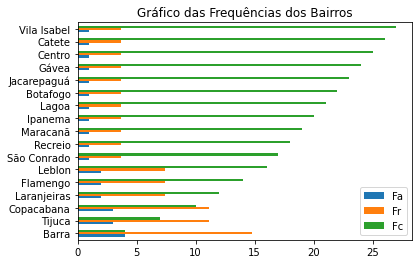

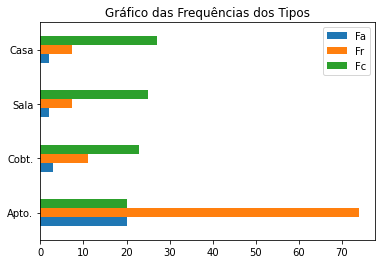

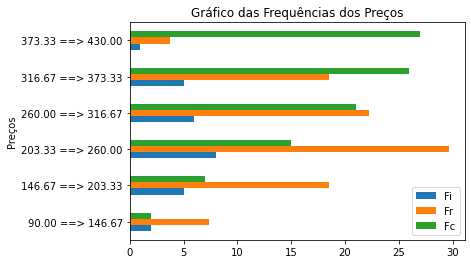

In [41]:
plt.show(dadosbairros.plot.barh(title="Gráfico das Frequências dos Bairros"))

plt.show(dadostipo.plot.barh(title="Gráfico das Frequências dos Tipos"))

plt.show(dadosprecos2.plot.barh(title="Gráfico das Frequências dos Preços"))


_____________

#### **3. O conjunto de dados dados3.xls traz informações sobre um questionário aplicado aos alunos do primeiro ano do ensino médio de uma escola fornecendo informações sobre as seguintes variáveis:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados3 = pd.read_excel("dados3.xls")
dados3

,Turma,Sexo,Idade,Alt,Peso,Filhos,Fuma,Toler,Exerc,Cine,OpCine,TV,OpTV
0,A,F,17,1.60,60.5,2,NAO,P,0,1,B,16,R
1,A,F,18,1.69,55.0,1,NAO,M,0,1,B,7,R
2,A,M,18,1.85,72.8,2,NAO,P,5,2,M,15,R
3,A,M,25,1.85,80.9,2,NAO,P,5,2,B,20,R
4,A,F,19,1.58,55.0,1,NAO,M,2,2,B,5,R
5,A,M,19,1.76,60.0,3,NAO,M,2,1,B,2,R
6,A,F,20,1.60,58.0,1,NAO,P,3,1,B,7,R
7,A,F,18,1.64,47.0,1,SIM,I,2,2,M,10,R
8,A,F,18,1.62,57.8,3,NAO,M,3,3,M,12,R
9,A,F,17,1.64,58.0,2,NAO,M,2,2,M,10,R


#### **A) classifique cada variável do conjunto;**

**Turma: Qualitativa Nominal**

**Genero: Qualitativa Nominal**

**Idade: Quantitativa Contínua**

**Altura: Quantitativa Contínua**

**Peso: Quantitativa Contínua**

**Filhos: Quantitativa Discreta**

**Fuma: Qualitativa Nominal**

**Tolr: Qualitativa Nominal**

**Exerc: Quantitativa Discreta**

**Cine: Quantitativa Discreta**

**OpCine: Qualitativa Ordinal**

**TV: Quantitativa Discreta**

**OpTV: Qualitativa Ordinal**

#### **B) monte uma distribuição de frequência para cada uma das variáveis;**

In [47]:
def qualitativas (x:str):
    dados_final = pd.DataFrame({"Fa": dados3[x].value_counts(),
             "Fr": np.around(dados3[x].value_counts()/dados3[x].value_counts().sum()*100,decimals=2),
            "Fc": np.cumsum(dados3[x].value_counts()).astype(int)})
    
    return dados_final



def quantitativa(x:str):
    
    df2 = pd.DataFrame(dados3[x])
    
    fa,classes= np.histogram(df2, bins='auto') 
    fa = fa.astype(int)
    fr = np.around(fa/fa.sum()*100,decimals=2) 
    fc = np.cumsum(fa).astype(int)

    classe_str = []
    for i in range(len(classes)):
        if i<=len(classes)-2:
            classe_str.append('{:2.2f} --> {:2.2f}' .format(classes[i],classes[i+1]))
        else:
            break 

    dfinal = pd.DataFrame({x: classe_str, 
                         'Fi': fa,
                         'Fr': fr,
                         'Fc': fc
                        }).set_index(x)
    
    return dfinal

dfturma = qualitativas("Turma")
print("\033[31m           TURMAS    \033[m ")
display(dfturma)
dfsexo = qualitativas("Sexo")
print("\033[31m           SEXO    \033[m ")
display(dfsexo)
dfidade = quantitativa("Idade")
print("\033[31m           IDADE    \033[m ")
display(dfidade)
dfaltura = quantitativa("Alt")
print("\033[31m           ALTURA    \033[m ")
display(dfaltura)
dfpeso = quantitativa("Peso")
print("\033[31m           PESO    \033[m ")
display(dfpeso)
dffilhos = qualitativas("Filhos")
print("\033[31m           FILHOS    \033[m ")
display(dffilhos)
dffumantes = qualitativas("Fuma")
print("\033[31m           FUMANTES    \033[m ")
display(dffumantes)
dftoler = qualitativas("Toler")
print("\033[31m           TOLERANTES    \033[m ")
display(dftoler)
dfexer = quantitativa("Exerc")
print("\033[31m           EXERCICIOS    \033[m ")
display(dfexer)
dfcine = quantitativa("Cine")
print("\033[31m           CINEMA    \033[m ")
display(dfcine)
dfopc = qualitativas("OpCine")
print("\033[31m           OPCINE    \033[m ")
display(dfopc)
dftv = quantitativa("TV")
print("\033[31m           TV    \033[m ")
display(dftv)
dfoptv = qualitativas("OpTV")
print("\033[31m           OPTV    \033[m ")
display(dfoptv)

           TURMAS     


,Fa,Fr,Fc
A,26,52.0,26
B,24,48.0,50


           SEXO     


,Fa,Fr,Fc
F,37,74.0,37
M,13,26.0,50


           IDADE     


,Fi,Fr,Fc
Idade,,,
17.00 --> 17.53,9,18.0,9
17.53 --> 18.07,22,44.0,31
18.07 --> 18.60,0,0.0,31
18.60 --> 19.13,7,14.0,38
19.13 --> 19.67,0,0.0,38
19.67 --> 20.20,4,8.0,42
20.20 --> 20.73,0,0.0,42
20.73 --> 21.27,3,6.0,45
21.27 --> 21.80,0,0.0,45


           ALTURA     


,Fi,Fr,Fc
Alt,,,
1.45 --> 1.51,1,2.0,1
1.51 --> 1.56,4,8.0,5
1.56 --> 1.62,12,24.0,17
1.62 --> 1.68,9,18.0,26
1.68 --> 1.74,14,28.0,40
1.74 --> 1.79,3,6.0,43
1.79 --> 1.85,7,14.0,50


           PESO     


,Fi,Fr,Fc
Peso,,,
44.00 --> 51.29,10,20.0,10
51.29 --> 58.57,19,38.0,29
58.57 --> 65.86,7,14.0,36
65.86 --> 73.14,7,14.0,43
73.14 --> 80.43,1,2.0,44
80.43 --> 87.71,5,10.0,49
87.71 --> 95.00,1,2.0,50


           FILHOS     


,Fa,Fr,Fc
1,28,56.0,28
2,14,28.0,42
3,6,12.0,48
4,1,2.0,49
7,1,2.0,50


           FUMANTES     


,Fa,Fr,Fc
NAO,44,88.0,44
SIM,6,12.0,50


           TOLERANTES     


,Fa,Fr,Fc
P,21,42.0,21
M,19,38.0,40
I,10,20.0,50


           EXERCICIOS     


,Fi,Fr,Fc
Exerc,,,
0.00 --> 1.43,11,22.0,11
1.43 --> 2.86,8,16.0,19
2.86 --> 4.29,10,20.0,29
4.29 --> 5.71,8,16.0,37
5.71 --> 7.14,8,16.0,45
7.14 --> 8.57,3,6.0,48
8.57 --> 10.00,2,4.0,50


           CINEMA     


,Fi,Fr,Fc
Cine,,,
0.00 --> 0.50,3,6.0,3
0.50 --> 1.00,0,0.0,3
1.00 --> 1.50,21,42.0,24
1.50 --> 2.00,0,0.0,24
2.00 --> 2.50,18,36.0,42
2.50 --> 3.00,0,0.0,42
3.00 --> 3.50,3,6.0,45
3.50 --> 4.00,0,0.0,45
4.00 --> 4.50,4,8.0,49


           OPCINE     


,Fa,Fr,Fc
B,32,64.0,32
M,18,36.0,50


           TV     


,Fi,Fr,Fc
TV,,,
0.00 --> 4.29,7,14.0,7
4.29 --> 8.57,13,26.0,20
8.57 --> 12.86,15,30.0,35
12.86 --> 17.14,7,14.0,42
17.14 --> 21.43,4,8.0,46
21.43 --> 25.71,2,4.0,48
25.71 --> 30.00,2,4.0,50


           OPTV     


,Fa,Fr,Fc
R,39,78.0,39
N,7,14.0,46
B,3,6.0,49
M,1,2.0,50


#### **C) crie um gráfico representando cada uam das variáveis disponíveis.**

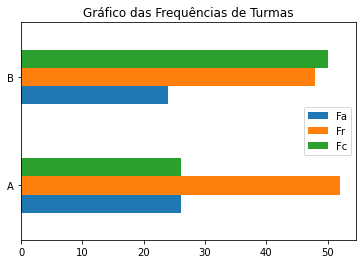

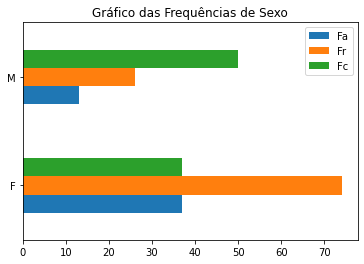

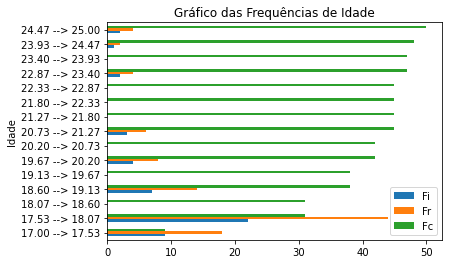

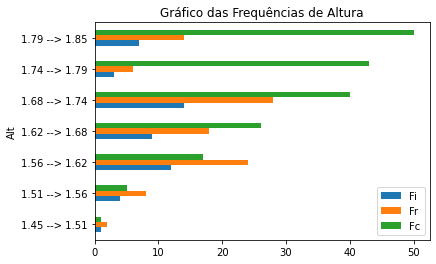

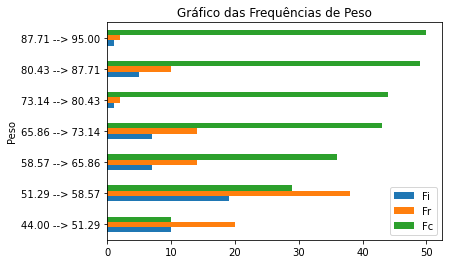

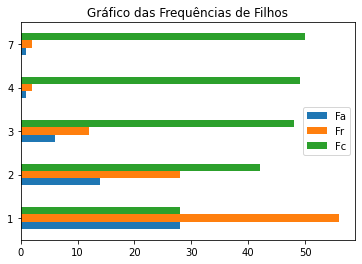

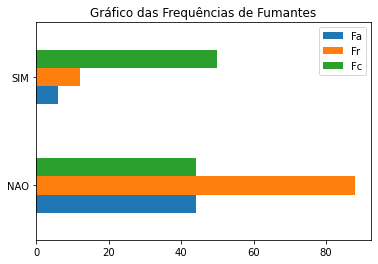

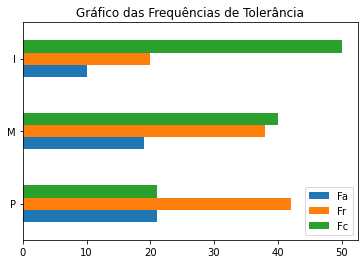

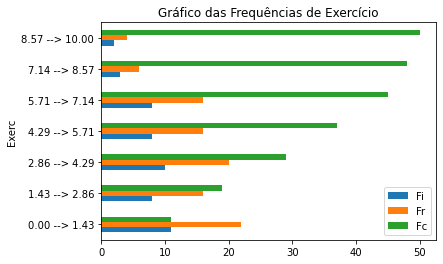

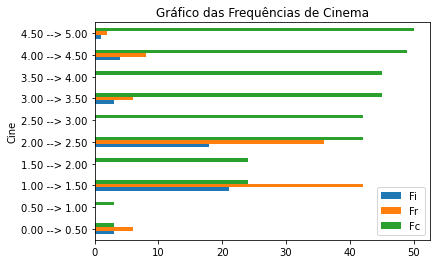

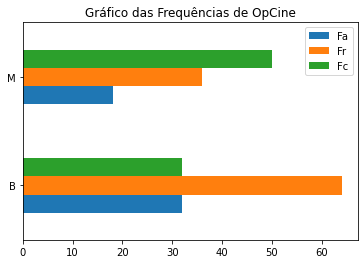

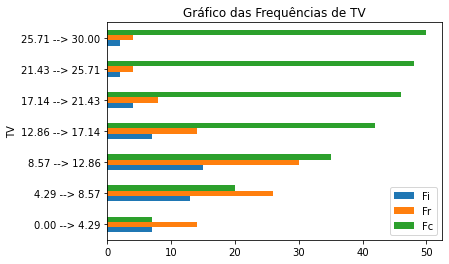

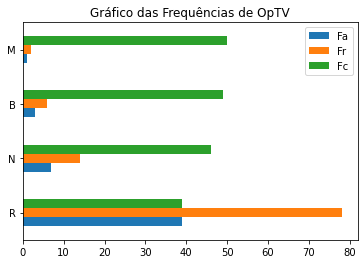

In [50]:
plt.show(dfturma.plot.barh(title="Gráfico das Frequências de Turmas"))
plt.show(dfsexo.plot.barh(title="Gráfico das Frequências de Sexo"))
plt.show(dfidade.plot.barh(title="Gráfico das Frequências de Idade"))
plt.show(dfaltura.plot.barh(title="Gráfico das Frequências de Altura"))
plt.show(dfpeso.plot.barh(title="Gráfico das Frequências de Peso"))
plt.show(dffilhos.plot.barh(title="Gráfico das Frequências de Filhos"))
plt.show(dffumantes.plot.barh(title="Gráfico das Frequências de Fumantes"))
plt.show(dftoler.plot.barh(title="Gráfico das Frequências de Tolerância"))
plt.show(dfexer.plot.barh(title="Gráfico das Frequências de Exercício"))
plt.show(dfcine.plot.barh(title="Gráfico das Frequências de Cinema"))
plt.show(dfopc.plot.barh(title="Gráfico das Frequências de OpCine"))
plt.show(dftv.plot.barh(title="Gráfico das Frequências de TV"))
plt.show(dfoptv.plot.barh(title="Gráfico das Frequências de OpTV"))

------------